In [1]:
import os, sys
from pathlib import Path
import pandas as pd

project_path = Path(os.getcwd())
sys.path.append(str(project_path) +'/')

data_path =  project_path/'PPMI_Data'/'freesurfer_v6'/'aseg_lh_rh_vol_ct_freesurferFlipped_v6_PPMI_noDups_age_sex_gene_snps_prs_dropUnnecessaryColumns_normalizedVols_reorderUKBB_normalized01ALL.csv'#aseg_vol_prs_nonRegress_genesRecoded_PPMI_droppedUnnecessaryColumns_normalized_imputed.csv'#aseg_vol_rh_lh_aparc_prs_genesRecoded_PPMI_droppedUnnecessaryColumns_imputed.csv' #'PPMI_data'/'aseg_vol_prs_genesRecoded_PPMI_droppedUnnecessaryColumns.csv'# prs-pd-counterfactual/PPMI_data/aseg_vol_rh_lh_aparc_prs_genesRecoded_PPMI_droppedUnnecessaryColumns_imputed.csv #'aseg_vol_rh_lh_aparc_prs_PPMI_droppedUnnecessaryColumns_imputed.csv' #project_path/'PPMI_data'/'aseg_vol_prs_PPMI_droppedUnnecessaryColumns.csv' # #project_path/'UKBB_data_extraction'/'ukbb_CMR_PD.csv'

In [2]:

from utils.datasets import PRSDataframe

dataset = PRSDataframe(data_path)

In [3]:
import torch
from  torch.utils.data import DataLoader,random_split
import math
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pickle
from automacaw_mmnist import automacaw_mmnist

In [4]:
features = 172 #174 #119 #48 #189 # NUM OF FEATURES #ukbb = 140 #PPMI = 106 PPMI only vol = 45 #PPMI freesurfer vols = 49, vols_ct_sa = 188

In [5]:
batch_size = 64
m =len(dataset)
print(m)
train_data, val_data = random_split(dataset, [math.floor(m-m*0.2), math.ceil(m*0.2)], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_data, batch_size=batch_size)
val_loader = DataLoader(val_data, batch_size=batch_size)

359


In [75]:
import pandas as pd

train_set = []

# Iterate over the trainidation loader
for x_obs in train_loader:
   train_set.append(x_obs)


train_set = torch.cat(train_set, dim=0)

print(f'Training set size: {train_set.size()}')


# Assuming train_indices and train_data have been defined previously and train_set is equitrainent to x_obs
train_indices = train_data.indices 
train_indices_list = list(train_indices)

# Convert the trainidation set (x_obs) to a DataFrame if it's not already one, using indices for alignment
train_set_df = pd.DataFrame(train_set, index=train_indices_list)

# Filter the trainidation set based on your conditions (e.g., column 4 equals 0 and column 30 equals 0)
filtered_rows_for_cf = train_set_df[(train_set_df.iloc[:, 12] == 1) ]#& (train_set_df.iloc[:, 30] == 0)]



# Get the indices of the filtered rows
filtered_indices = filtered_rows_for_cf.index

# Map these indices back to the original dataframe to get the subset
matched_train_df = dataset.df.iloc[train_indices_list]

# Extract the group information for the filtered subset
filtered_subset_with_group_info = matched_train_df.loc[filtered_indices, 'Group']

# Display the shape and the content of the filtered subset with group info
print(filtered_subset_with_group_info.shape)
print(filtered_subset_with_group_info.head())  # Show the first few rows

# If you want to convert it to a list
group_info_list = filtered_subset_with_group_info.tolist()
print(group_info_list)


Training set size: torch.Size([287, 220])
(67,)
120         PD
101         PD
125    Control
293         PD
228         PD
Name: Group, dtype: object
['PD', 'PD', 'Control', 'PD', 'PD', 'Control', 'PD', 'Control', 'Control', 'PD', 'PD', 'Prodromal', 'PD', 'PD', 'Control', 'PD', 'Control', 'Control', 'Control', 'Control', 'PD', 'Prodromal', 'PD', 'PD', 'PD', 'Control', 'PD', 'PD', 'Control', 'Prodromal', 'PD', 'Prodromal', 'Control', 'PD', 'PD', 'PD', 'PD', 'PD', 'PD', 'PD', 'Control', 'Control', 'Control', 'Control', 'PD', 'Control', 'Prodromal', 'PD', 'PD', 'Prodromal', 'Control', 'Control', 'PD', 'PD', 'PD', 'Control', 'PD', 'Control', 'PD', 'PD', 'PD', 'Control', 'PD', 'PD', 'PD', 'Control', 'Control']


In [6]:
train_data.dataset.df


,PATNO,Subject,Image.Data.ID,Group,Sex,Sex_Numeric,Age,Visit,Modality,Description,...,lh_precuneus_thickness,lh_rostralanteriorcingulate_thickness,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_thickness,lh_superiorparietal_thickness,lh_superiortemporal_thickness,lh_supramarginal_thickness,lh_transversetemporal_thickness,lh_insula_thickness,eTIV
0,3000,3000,I224562,Control,F,0,69,BL,MRI,sag 3D FSPGR BRAVO straight,...,0.834651,0.918302,0.800471,0.701863,0.598354,0.534731,0.615535,0.718099,0.727418,0.476979
1,3001,3001,I224574,PD,M,1,65,BL,MRI,sag 3D FSPGR BRAVO straight,...,0.797760,0.717937,0.669285,0.676329,0.594239,0.610778,0.653394,0.596369,0.845909,0.635789
2,3004,3004,I243167,Control,M,1,59,BL,MRI,sag 3D FSPGR BRAVO straight,...,0.839262,0.837517,0.886881,0.792271,0.693004,0.724551,0.647520,0.724506,0.739639,0.531695
3,3006,3006,I243182,PD,F,0,58,BL,MRI,sag 3D FSPGR BRAVO straight,...,0.847167,0.843450,0.783975,0.755694,0.658436,0.765269,0.755875,0.836626,0.802338,0.557831
4,3007,3007,I1393672,PD,M,1,65,BL,MRI,sag 3D FSPGR BRAVO straight,...,0.762187,0.749429,0.677926,0.587992,0.656790,0.571257,0.642298,0.745328,0.780553,0.885265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,60170,60170,I468243,Prodromal,M,1,62,BL,MRI,axial spgr,...,0.743742,0.756276,0.618225,0.668047,0.397531,0.497006,0.480418,0.351308,0.727949,0.512630
355,60171,60171,I574351,Prodromal,M,1,69,BL,MRI,T1,...,0.685112,0.772707,0.633150,0.563837,0.270782,0.744910,0.580287,0.728777,0.925080,0.912824
356,65002,65002,I437357,Prodromal,F,0,62,BL,MRI,MPRAGE w/ GRAPPA,...,0.764822,0.690552,0.693637,0.687371,0.633745,0.682036,0.669713,0.734650,0.750797,0.270025
357,85236,85236,I643413,Prodromal,M,1,68,V04,MRI,MPRAGE_GRAPPA_ADNI,...,0.799078,0.640803,0.693637,0.657695,0.587654,0.700599,0.645561,0.817405,0.721573,0.665807


In [7]:
 test = next(iter(train_data))
print(test)
 print(test.shape)

[6.10000000e+01 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 1.00000000e+00 2.00000000e+00 1.00000000e+00
 0.00000000e+00 2.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 1.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 2.00000000e+00 0.00000000e+00 0.00000000e+00
 4.59795340e-01 1.63012461e-01 2.05505076e-01 4.91492684e-01
 3.54125265e-01 3.08785369e-01 6.57897575e-01 2.73786978e-01
 3.06720482e-01 3.94857135e-01 4.24044885e-01 2.19702864e-01
 5.19785734e-01 2.55716817e-01 3.54117641e-01 4.61417935e-01
 4.35995433e-01 3.664470

In [8]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

## Train Flow

In [9]:
from automacaw_prs_pd_snps import automacaw_prs_pd

automacaw_model = automacaw_prs_pd(encoded_dim=features)
losses = {'nll_train_loss':[],'nll_val_loss':[]}

automacaw_model.macaw = automacaw_model._init_macaw()

Selected device: cpu


/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/automacaw_prs_pd_snps.py:174: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1708025569485/work/torch/csrc/utils/tensor_new.cpp:275.)
  priors = [(slice(0, 1), td.Categorical(torch.tensor([P_age]).to(self.device))),  # age


In [10]:
early_stopper = EarlyStopper(patience=10, min_delta=0.1)

for epoch in (pbar := tqdm(range(100))):
    nll_train_loss = automacaw_model.train_macaw(train_loader, lr=0.001)
    nll_val_loss = automacaw_model.test_likelihood(val_loader)
    
    losses['nll_train_loss'].append(nll_train_loss)
    losses['nll_val_loss'].append(nll_val_loss)
    
#     clear_output()
#     fig = cf_test(automacaw_model,val_loader)
    
#     print(f"nll_train: {nll_train_loss:.3f}, nll_val: {losses['nll_val_loss'][-1]:.3f}")
#     display(fig)
    
    pbar.set_description(f"nll_train: {nll_train_loss:.3f}, nll_val: {losses['nll_val_loss'][-1]:.3f}")
    
    
    if early_stopper.early_stop(nll_val_loss):             
        break    
        
#     clear_output()
#     fig = automacaw_model.plot_ae_outputs(val_loader)
    


  0%|          | 0/100 [00:00<?, ?it/s]

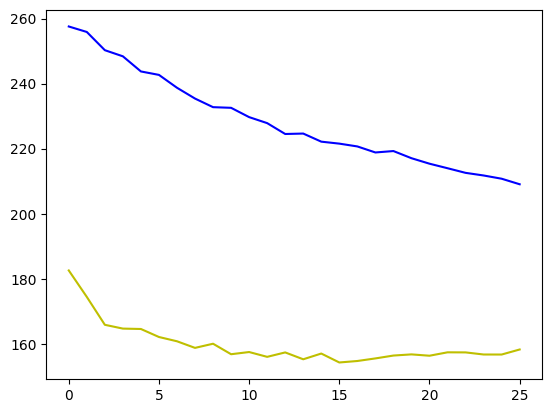

In [10]:
plt.plot(losses['nll_train_loss'],color='b')
plt.plot(losses['nll_val_loss'],color='y')                                  



In [10]:
torch.save(automacaw_model,"/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/PPMI_data/automacaw_model_age_sex_snps_apoe4_freesurfer_v6_ukbb_vols_aparc_ct_vols.pt")

In [42]:
# automacaw_model1 = torch.load("/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/PPMI_data/automacaw_model_age_sex_cohort_freesurferVols.pt")

## Counterfactuals

In [11]:
val_set = []

# Iterate over the validation loader
for x_obs in val_loader:
   val_set.append(x_obs)


val_set = torch.cat(val_set, dim=0)

print(f'Validation set size: {val_set.size()}')

Validation set size: torch.Size([72, 220])


In [12]:
snp1 = 30 # 28
snp2 = 4

In [13]:
true1 = 0
true2 = 0

cf1 = 1
cf2 = 1

In [34]:

print(val_set[:,5])



#filtered_rows_for_cf

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=torch.float64)


In [183]:
x_obs = val_set
m = automacaw_model.feature_mean.detach().cpu().numpy()
s = automacaw_model.feature_std.detach().cpu().numpy()

filtered_rows_for_cf = x_obs[ (x_obs[:,snp1] == true1 ) & (x_obs[:,snp2] == true2)] # > 1 (x_obs[:, 1] == 1)] &
x_cf = automacaw_model.counterfactual(filtered_rows_for_cf, {snp1:cf1,snp2:cf2}) # -2 # min age == 31 so have to subtract from cf
#x_cf = automacaw_model.counterfactual(x_obs, {1:0})
features = x_cf[:,48:] * s + m
x_obs = x_obs.detach().cpu().numpy()

In [184]:
print(x_obs.shape)
print(features.shape)

(72, 220)
(2, 172)


In [55]:
# average analyses

In [185]:
# filtered_rows = x_obs[x_obs[:, snp] == 0]#& (x_obs[:,1] == 1)] # > 1
filtered_rows = x_obs[(x_obs[:,snp1] == true1 ) & (x_obs[:,snp2] == true2)]
print(filtered_rows)

[[4.90000000e+01 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.00000000e+00 0.00000000e+00
  1.00000000e+00 2.00000000e+00 2.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 2.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.00000000e+00 0.00000000e+00
  1.18537694e-01 1.66398685e-01 3.67871179e-01 2.83794434e-01
  6.25042608e-01 5.70242005e-01 8.87266768e-01 4.00275911e-01
  2.51993346e-01 1.43730251e-01 6.03668610e-01 5.50603912e-01
  3.87601094e-01 2.53058669e-01 3.34476870e-01 3.70861116e-01
  2.8659

In [186]:
averages = np.mean(filtered_rows[:, 48:], axis=0) #-1

In [187]:
averages.shape


(172,)

In [188]:

print(x_cf[:,snp1])
print(x_obs[:,snp1])


[0. 0.]
[0. 1. 1. 1. 0. 0. 0. 0. 1. 2. 0. 1. 2. 0. 0. 1. 1. 0. 1. 1. 1. 2. 1. 2.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 2. 0. 1. 1. 2. 1. 2. 0. 1. 1. 2.
 1. 1. 0. 1. 0. 2. 2. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 2. 1. 1. 1.]


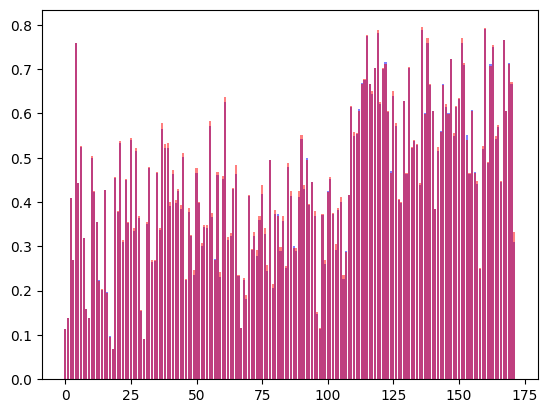

In [189]:
#x_obs are true vals and features are cfs
plt.bar(np.arange(172), averages, color='b', alpha=0.5) # 139 # all xx people averaged
plt.bar(np.arange(172), (np.mean(features[:, 0:], axis=0)), color='r', alpha=0.5) #[:, 1:] # changed all xx people to yy
plot_filename = f"/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/ppmi_testset/snps/CF_plot_snp1_{snp1}_snp2_{snp2 if snp2 is not None else 'NA'}_true1_{true1}_cf1_{cf1}_true2_{true2 if snp2 is not None else 'NA'}_cf2_{cf2 if snp2 is not None else 'NA'}.svg"
plt.savefig(plot_filename)
# so would expect sizes to increase when making healthy, right??

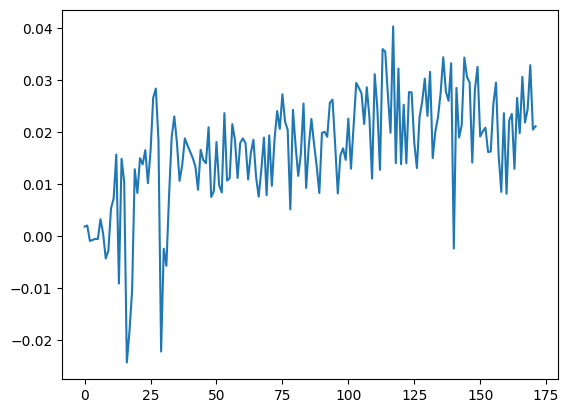

In [141]:
plt.plot((averages) - (np.mean(features[:, 0:], axis=0))) # [:, 1:] # averages should be smaller then features so should be negative values

In [142]:
diff = (averages) - (np.mean(features[:, 0:], axis=0)) # [:, 1:]
vals = np.argwhere(abs(diff) > 0.00)
#vals = np.argwhere(diff > 500)

In [143]:
dataset.df.columns

Index(['PATNO', 'Subject', 'Image.Data.ID', 'Group', 'Sex', 'Sex_Numeric',
       'Age', 'Visit', 'Modality', 'Description',
       ...
       'lh_precuneus_thickness', 'lh_rostralanteriorcingulate_thickness',
       'lh_rostralmiddlefrontal_thickness', 'lh_superiorfrontal_thickness',
       'lh_superiorparietal_thickness', 'lh_superiortemporal_thickness',
       'lh_supramarginal_thickness', 'lh_transversetemporal_thickness',
       'lh_insula_thickness', 'eTIV'],
      dtype='object', length=296)

In [31]:
print(dataset.df.columns[189]) #124
print(dataset.df.columns[147]) #124
print(dataset.df.columns[130]) #124

rh_parstriangularis_volume
Right.Putamen
Left.Putamen


In [145]:
for val in vals:
    print(val, diff[val])
    print(dataset.df.columns[val+124]) #4 UKBB, 25 PPMI

[0] [0.00180412]
Index(['Left.Lateral.Ventricle'], dtype='object')
[1] [0.00201118]
Index(['Left.Inf.Lat.Vent'], dtype='object')
[2] [-0.00095098]
Index(['Left.Cerebellum.White.Matter'], dtype='object')
[3] [-0.00076723]
Index(['Left.Cerebellum.Cortex'], dtype='object')
[4] [-0.0005509]
Index(['Left.Thalamus.Proper'], dtype='object')
[5] [-0.00059096]
Index(['Left.Caudate'], dtype='object')
[6] [0.00321319]
Index(['Left.Putamen'], dtype='object')
[7] [0.00051162]
Index(['Left.Pallidum'], dtype='object')
[8] [-0.00432906]
Index(['X3rd.Ventricle'], dtype='object')
[9] [-0.00282235]
Index(['X4th.Ventricle'], dtype='object')
[10] [0.00528185]
Index(['Brain.Stem'], dtype='object')
[11] [0.00720297]
Index(['Left.Hippocampus'], dtype='object')
[12] [0.01564588]
Index(['Left.Amygdala'], dtype='object')
[13] [-0.00914095]
Index(['CSF'], dtype='object')
[14] [0.01482909]
Index(['Left.Accumbens.area'], dtype='object')
[15] [0.01036571]
Index(['Left.VentralDC'], dtype='object')
[16] [-0.02430476]


In [ ]:
# T-Tests

In [76]:
import pandas as pd
from scipy.stats import ttest_ind

In [12]:
column_names = dataset.df.columns[124:].values.tolist()
print(column_names)

['Left.Lateral.Ventricle', 'Left.Inf.Lat.Vent', 'Left.Cerebellum.White.Matter', 'Left.Cerebellum.Cortex', 'Left.Thalamus.Proper', 'Left.Caudate', 'Left.Putamen', 'Left.Pallidum', 'X3rd.Ventricle', 'X4th.Ventricle', 'Brain.Stem', 'Left.Hippocampus', 'Left.Amygdala', 'CSF', 'Left.Accumbens.area', 'Left.VentralDC', 'Left.choroid.plexus', 'Right.Lateral.Ventricle', 'Right.Inf.Lat.Vent', 'Right.Cerebellum.White.Matter', 'Right.Cerebellum.Cortex', 'Right.Thalamus.Proper', 'Right.Caudate', 'Right.Putamen', 'Right.Pallidum', 'Right.Hippocampus', 'Right.Amygdala', 'Right.Accumbens.area', 'Right.VentralDC', 'Right.choroid.plexus', 'WM.hypointensities', 'Optic.Chiasm', 'CC_Posterior', 'CC_Mid_Posterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Anterior', 'BrainSegVol', 'BrainSegVolNotVent.x', 'BrainSegVolNotVentSurf', 'lhCortexVol', 'rhCortexVol', 'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'SubCortGrayVol', 'TotalGrayVol', 'SupraTentorialVol', 'SupraTentorialVolNotVent', 'rh_caudalanter

In [178]:
print(filtered_rows[:, 48:].shape)
print(features.shape)

(5, 172)
(5, 172)


In [179]:
true = pd.DataFrame(filtered_rows[:, 48:], columns=column_names)
cfs = pd.DataFrame(features[:,0:], columns=column_names)
print(cfs.shape)
print(true.shape)



(5, 172)
(5, 172)


In [80]:
# true.to_csv("/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/trueValues_g2019s_0_to_1_exp_flipped_aseg_ct_vol.csv", sep=',')
# cfs.to_csv("/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/cfValues_g2019s_0_to_1_exp_flipped_aseg_ct_vol.csv", sep=',')


In [113]:


# true_file_path = f"/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/ppmi_testset/snps/trueValues_LRRK2_{true1}_{cf1}_freesurfer_v6_ukbbTestSet_vols_aseg_ct_vol.csv"
# cf_file_path = f"/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/ppmi_testset/snps/cfValues_LRRK2_{true1}_{cf1}_freesurfer_v6_ukbbTestSet_vols_aseg_ct_vol.csv"
  
# # Save the DataFrames to the new file paths
# true.to_csv(true_file_path, sep=",")
# cfs.to_csv(cf_file_path, sep=",")

In [191]:


true_file_path = f"/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/ppmi_testset/snps/trueValues_LRRK2_{true1}_{cf1}_e365k_{true2}_{cf2}_freesurfer_v6_ukbbTestSet_vols_aseg_ct_vol.csv"
cf_file_path = f"/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/ppmi_testset/snps/cfValues_LRRK2_{true1}_{cf1}_e365k_{true2}_{cf2}_freesurfer_v6_ukbbTestSet_vols_aseg_ct_vol.csv"

# Save the DataFrames to the new file paths
true.to_csv(true_file_path, sep=",")
cfs.to_csv(cf_file_path, sep=",")

In [173]:
snp1 = 16
snp2 = 4

true1 = 0
true2 = 0

cf1 = 2
cf2 = 1

age_index = 0

In [179]:
print(val_set[:,0])


tensor([59., 52., 56., 60., 77., 50., 44., 65., 63., 41., 61., 58., 69., 70.,
        54., 63., 65., 72., 67., 53., 52., 57., 61., 72., 72., 42., 54., 51.,
        64., 71., 70., 71., 63., 67., 67., 64., 51., 59., 72., 77., 66., 54.,
        57., 74., 64., 56., 69., 67., 65., 61., 66., 64., 49., 69., 74., 64.,
        53., 82., 46., 64., 62., 43., 70., 67., 75., 59., 75., 52., 60., 49.,
        61., 67.], dtype=torch.float64)


In [180]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

num_bins = 8  # For example, divide into 8 bins
age_min = df['age'].min()
age_max = df['age'].max()




# Initialize a list to store results
all_counterfactuals = []

for start_age in age_range:

    # Filter observations for the current age bin
    rows = x_obs[(x_obs[:, 3] == 0)]
    

    if age_bin_rows.shape[0] == 0:
        print("hi")
        continue  # Skip if no observations for this age bin
    
    # Generate counterfactuals for the filtered rows
    counterfactuals = automacaw_model.counterfactual(age_bin_rows, {snp1: cf1}) # , snp2: cf2})
    
    # De-normalize the counterfactuals
    features = counterfactuals[:, 47:] * s + m
    
    # Store the results
    all_counterfactuals.append(features)

# Combine all counterfactuals to form the joint distribution
joint_distribution = np.vstack(all_counterfactuals)

# Calculate and print summary statistics
mean_values = np.mean(joint_distribution, axis=0)
std_values = np.std(joint_distribution, axis=0)

print("Mean of joint distribution across age bins:", mean_values)
print("Standard deviation of joint distribution across age bins:", std_values)

# Visualization
# Example: Plotting the distribution of a specific feature (e.g., Brain IDP 1)
feature_index = 0  # Adjust the index based on the feature of interest

sns.histplot(joint_distribution[:, feature_index], kde=True)
plt.title("Distribution of Brain IDP 1 across age bins with SNP risk alleles")
plt.xlabel("Brain IDP 1")
plt.ylabel("Frequency")
plt.show()




TypeError: 'float' object cannot be interpreted as an integer

# PLOTTING OVER AGES For ONE FEATURE

In [40]:
ages = range(0, 53) 

true_values = []
counterfactual_values = []
average_true_values = []
average_counterfactual_values = []

for curr_age in ages:
    x_obs = val_set
    m = automacaw_model.feature_mean.detach().cpu().numpy()
    s = automacaw_model.feature_std.detach().cpu().numpy()
    
    filtered_rows_for_cf = x_obs[ (x_obs[:,3] == 0 ) ]#& (x_obs[:,snp2] == true2)] # > 1 (x_obs[:, 1] == 1)] &
    x_cf = automacaw_model.counterfactual(filtered_rows_for_cf, {3:1,0:curr_age}) # -2 # min age == 31 so have to subtract from cf
    #x_cf = automacaw_model.counterfactual(x_obs, {1:0})
    features = x_cf[:,48:] * s + m
    x_obs = x_obs.detach().cpu().numpy()
    counterfactual_params = {3: 1, 0: curr_age}  # Adjust 'age' key based on your dataset
   
    # Extract true and counterfactual values for the feature of interest
    true_feature_values = filtered_rows_for_cf[:, 219].detach().cpu().numpy() 
    cf_feature_values = features[:, -1]
    
    # Store values for plotting
    true_values.extend(true_feature_values)
    counterfactual_values.extend(cf_feature_values)
    
    avg_true_value = np.mean(true_values)
    avg_counterfactual_value = np.mean(counterfactual_values)
    
    # Append average values to lists
    average_true_values.append(avg_true_value)
    average_counterfactual_values.append(avg_counterfactual_value)

In [39]:
print(true_values
     )

[0.531695333515003, 0.583848107022312, 0.257459335669923, 0.457259724215736, 0.411037311528368, 0.377802337083284, 0.59777715360437, 0.735712461611144, 0.653636436384234, 0.612909675705997, 0.549486864460065, 0.0625721891301377, 0.609788256988305, 0.571776887228914, 0.497536739128582, 0.39745114970983, 0.635788579745837, 0.617450818677836, 0.34041496456001, 0.717729937564068, 0.197506688086841, 0.742625281253425, 0.484794827551619, 0.444403698768384, 0.908584733672373, 0.2856669744587, 0.255600740564779, 0.493795593664339, 0.278433029975687, 0.636907976357198, 0.370393985915009, 0.475187089668277, 0.81108234497545, 0.619530071537053, 0.535985528053256, 0.21944219779143, 0.194583785428156, 0.60421724104685, 0.258453454162009, 0.156384783547761, 0.677587553604598, 0.258349016867717, 0.176910847611478, 0.658764547175285, 0.56544507767799, 0.262335572975462, 0.569336254951242, 0.657187568414931, 0.885264851138356, 0.549921662901508, 0.643481050703462, 0.571330411139131, 0.447692373684064, 

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
average_counterfactual_values

array([0.47361513, 0.47311091, 0.47257661, 0.47203198, 0.47147459,
       0.47090825, 0.47033677, 0.46977472, 0.46923333, 0.46872839,
       0.46826358, 0.4678466 , 0.46748169, 0.46717028, 0.4669115 ,
       0.4667064 , 0.46655742, 0.46646067, 0.46641204, 0.46640701,
       0.46644295, 0.46651709, 0.46662562, 0.46676313, 0.46692552,
       0.46710718, 0.46730194, 0.4675041 , 0.46770756, 0.4679093 ,
       0.46810679, 0.46829692, 0.46847737, 0.46864726, 0.46880532,
       0.46894994, 0.46908162, 0.46920023, 0.46930473, 0.46939621,
       0.46947443, 0.46954014, 0.46959362, 0.46963498, 0.46966539,
       0.4696852 , 0.46969445, 0.46969384, 0.46968428, 0.46966677,
       0.4696427 , 0.46961316, 0.46957929])

In [ ]:
import matplotlib.pyplot as plt

# Assuming x_obs contains the data where the first column represents ages and the 220th column represents feature 219

# Extract ages and feature 219 values
ages = x_obs[:, 0]
feature_219_values = x_obs[:, 219]

# Create a histogram plot
plt.figure(figsize=(10, 6))
plt.hist(feature_219_values, bins=20, color='blue', alpha=0.7)

# Add labels and title
plt.title("Histogram of Feature 219 Values across Ages")
plt.xlabel("Feature 219 Value")
plt.ylabel("Frequency")

# Show plot
plt.grid(True)
plt.show()


In [212]:
bernoulli_snps = [2, 3, 5, 6,21, 22, 28, 31]
categorical_snps = [4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,23,24,25,26,27,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]# Define the scenarios for Bernoulli SNPs (only 0 and 1 are valid)
bernoulli_scenarios = [
    {"true": 0, "cf": 1},
    {"true": 1, "cf": 0}
]

# Define the scenarios for Categorical SNPs (0, 1, and 2 are valid)
categorical_scenarios = [
    {"true": 0, "cf": 1},
    {"true": 1, "cf": 0},
    {"true": 0, "cf": 2},
    {"true": 2, "cf": 2}
]

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the SNPs
snps = list(range(2, 48))

# Define the scenarios for each SNP
# scenarios = [
#     {"true": 0, "cf": 1},
#     {"true": 1, "cf": 0},
#     {"true": 0, "cf": 2},
#     {"true": 2, "cf": 2},
#     {"true": 1, "cf": 2},
#     {"true": 2, "cf": 1}
# ]

# Function to run counterfactual analysis
def run_counterfactual_analysis(snp1, true1, cf1, snp2=None, true2=1, cf2=0):
    print(snp1)
    x_obs = val_set
    m = automacaw_model.feature_mean.detach().cpu().numpy()
    s = automacaw_model.feature_std.detach().cpu().numpy()

    if snp2 is None:
        # Handle single SNP case
        filtered_rows_for_cf = x_obs[x_obs[:, snp1] == true1]
        print(filtered_rows_for_cf.shape)
    else:
        # Handle complex SNP case
        filtered_rows_for_cf = x_obs[(x_obs[:, snp1] == true1) & (x_obs[:, snp2] == true2)]

    
    if filtered_rows_for_cf.shape[0] == 0:
        print(f"No true values found for SNP {snp1} with true value {true1}" +
              (f" and SNP {snp2} with true value {true2}" if snp2 is not None else ""))
        return

    try:
        # Attempt to compute the counterfactual
        x_cf = automacaw_model.counterfactual(filtered_rows_for_cf, {snp1: cf1, snp2: cf2})
        
        # If successful, return the result
        # Transform features
        features = x_cf[:, 48:] * s + m
        x_obs_np = x_obs.detach().cpu().numpy()
    
        # Calculate averages
        filtered_rows = x_obs_np[x_obs_np[:, snp1] == true1]
        if snp2 is not None:
            filtered_rows = filtered_rows[filtered_rows[:, snp2] == true2]
    
        averages = np.mean(filtered_rows[:, 48:], axis=0)
    
        # Plot and save the results
        plt.bar(np.arange(172), averages, color='b', alpha=0.5)
        plt.bar(np.arange(172), np.mean(features[:, 0:], axis=0), color='r', alpha=0.5)
        plot_filename = f"/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/ppmi_testset/snps/tmp/CF_plot_snp1_{snp1}_snp2_{snp2 if snp2 is not None else 'NA'}_true1_{true1}_cf1_{cf1}_true2_{true2 if snp2 is not None else 'NA'}_cf2_{cf2 if snp2 is not None else 'NA'}.svg"
        plt.savefig(plot_filename)
        plt.clf()  # Clear the figure for the next plot
    
        column_names = dataset.df.columns[124:].values.tolist()
    
        true_df = pd.DataFrame(filtered_rows[:, 48:], columns=column_names)
        cf_df = pd.DataFrame(features[:, 0:], columns=column_names)
    
        true_file_path = f"/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/ppmi_testset/snps/tmp/trueValues_snp1_{snp1}_snp2_{snp2 if snp2 is not None else 'NA'}_true1_{true1}_cf1_{cf1}_true2_{true2 if snp2 is not None else 'NA'}_cf2_{cf2 if snp2 is not None else 'NA'}.csv"
        cf_file_path = f"/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/ppmi_testset/snps/tmp/cfValues_snp1_{snp1}_snp2_{snp2 if snp2 is not None else 'NA'}_true1_{true1}_cf1_{cf1}_true2_{true2 if snp2 is not None else 'NA'}_cf2_{cf2 if snp2 is not None else 'NA'}.csv"
    
        true_df.to_csv(true_file_path, sep=",")
        cf_df.to_csv(cf_file_path, sep=",")
        print("saved")
    
    except Exception as e:
        # Handle any exceptions by logging the error
        print("An error occurred during counterfactual computation.")
        print("Error details:", str(e))
        
        # Return None to indicate failure
        return None

    

# Run counterfactual analysis for each individual SNP with all scenarios
for snp in snps:
    if snp in bernoulli_snps:
        for scenario in bernoulli_scenarios:
            run_counterfactual_analysis(snp1=snp, true1=scenario["true"], cf1=scenario["cf"])
    elif snp in categorical_snps:
        for scenario in categorical_scenarios:
            run_counterfactual_analysis(snp1=snp, true1=scenario["true"], cf1=scenario["cf"])
    else:
        print(f"SNP {snp} is not categorized as Bernoulli or Categorical")



2
torch.Size([55, 220])
saved
2
torch.Size([17, 220])
saved
3
torch.Size([70, 220])
saved
3
torch.Size([2, 220])
saved
4
torch.Size([69, 220])
saved
4
torch.Size([3, 220])
saved
4
torch.Size([69, 220])
saved
4
torch.Size([0, 220])
No true values found for SNP 4 with true value 2
5
torch.Size([72, 220])
saved
5
torch.Size([0, 220])
No true values found for SNP 5 with true value 1
6
torch.Size([48, 220])
saved
6
torch.Size([17, 220])
saved
7
torch.Size([49, 220])
saved
7
torch.Size([18, 220])
saved
7
torch.Size([49, 220])
saved
7
torch.Size([5, 220])
saved
8
torch.Size([38, 220])
saved
8
torch.Size([30, 220])
saved
8
torch.Size([38, 220])
saved
8
torch.Size([4, 220])
saved
9
torch.Size([21, 220])
saved
9
torch.Size([35, 220])
saved
9
torch.Size([21, 220])
saved
9
torch.Size([16, 220])
saved
10
torch.Size([25, 220])
saved
10
torch.Size([41, 220])
saved
10
torch.Size([25, 220])
saved
10
torch.Size([6, 220])
saved
11
torch.Size([56, 220])
saved
11
torch.Size([14, 220])
saved
11
torch.Size([

<Figure size 640x480 with 0 Axes>

In [207]:
scenario_c = [
    {"snp1": 30, "true1": 0, "cf1": 1, "snp2": 4, "true2": 0, "cf2": 1},
    {"snp1": 30, "true1": 1, "cf1": 0, "snp2": 4, "true2": 1, "cf2": 0},
    {"snp1": 30, "true1": 0, "cf1": 0, "snp2": 4, "true2": 0, "cf2": 1},
    {"snp1": 30, "true1": 0, "cf1": 0, "snp2": 4, "true2": 1, "cf2": 0},
    {"snp1": 30, "true1": 0, "cf1": 1, "snp2": 4, "true2": 0, "cf2": 0},
    {"snp1": 30, "true1": 1, "cf1": 0, "snp2": 4, "true2": 0, "cf2": 0},
    {"snp1": 30, "true1": 0, "cf1": 2, "snp2": 4, "true2": 0, "cf2": 0},
    {"snp1": 30, "true1": 2, "cf1": 0, "snp2": 4, "true2": 0, "cf2": 0},
    {"snp1": 30, "true1": 0, "cf1": 2, "snp2": 4, "true2": 0, "cf2": 1},
    {"snp1": 30, "true1": 2, "cf1": 0, "snp2": 4, "true2": 1, "cf2": 0},
    {"snp1": 30, "true1": 0, "cf1": 1, "snp2": 4, "true2": 0, "cf2": 1},
    {"snp1": 3, "true1": 0, "cf1": 1, "snp2": 4, "true2": 0, "cf2": 1},
    {"snp1": 3, "true1": 1, "cf1": 0, "snp2": 4, "true2": 1, "cf2": 0},
    {"snp1": 3, "true1": 0, "cf1": 0, "snp2": 4, "true2": 0, "cf2": 1},
    {"snp1": 3, "true1": 0, "cf1": 0, "snp2": 4, "true2": 1, "cf2": 0},
    {"snp1": 3, "true1": 0, "cf1": 1, "snp2": 4, "true2": 0, "cf2": 0},
    {"snp1": 3, "true1": 1, "cf1": 0, "snp2": 4, "true2": 0, "cf2": 0},
    {"snp1": 30, "true1": 0, "cf1": 1, "snp2": 3, "true2": 0, "cf2": 1},
    {"snp1": 30, "true1": 1, "cf1": 0, "snp2": 3, "true2": 1, "cf2": 0},
    {"snp1": 30, "true1": 0, "cf1": 0, "snp2": 3, "true2": 0, "cf2": 1},
    {"snp1": 30, "true1": 0, "cf1": 0, "snp2": 3, "true2": 1, "cf2": 0},
    {"snp1": 30, "true1": 0, "cf1": 1, "snp2": 3, "true2": 0, "cf2": 0},
    {"snp1": 30, "true1": 1, "cf1": 0, "snp2": 3, "true2": 0, "cf2": 0},
    {"snp1": 30, "true1": 0, "cf1": 2, "snp2": 3, "true2": 0, "cf2": 0},
    {"snp1": 30, "true1": 2, "cf1": 0, "snp2": 3, "true2": 0, "cf2": 0},
    {"snp1": 30, "true1": 0, "cf1": 2, "snp2": 3, "true2": 0, "cf2": 1},
    {"snp1": 30, "true1": 2, "cf1": 0, "snp2": 3, "true2": 1, "cf2": 0},
    {"snp1": 30, "true1": 0, "cf1": 1, "snp2": 3, "true2": 0, "cf2": 1}
    

    # Add more scenarios as needed
    # {"snp1": ..., "true1": ..., "cf1": ..., "snp2": ..., "true2": ..., "cf2": ...}
]

In [208]:
# Run counterfactual analysis for each scenario
for scenario in scenario_c:
    run_counterfactual_analysis(snp1=scenario["snp1"], true1=scenario["true1"], cf1=scenario["cf1"],
                                snp2=scenario["snp2"], true2=scenario["true2"], cf2=scenario["cf2"])


30
saved
30
No true values found for SNP 30 with true value 1 and SNP 4 with true value 1
30
saved
30
saved
30
saved
30
saved
30
An error occurred during counterfactual computation.
Error details: Expected value argument (Tensor of shape (60, 1)) to be within the support (Boolean()) of the distribution Bernoulli(probs: tensor([0.1128]), logits: tensor([-2.0622])), but found invalid values:
tensor([[2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
     

<Figure size 640x480 with 0 Axes>

In [36]:
columns_true = range(1, len(true.columns))
columns_cfs = range(1, len(cfs.columns))

In [37]:
print(columns_true)

range(1, 188)


In [38]:
# Perform t-tests for each column
t_test_results = {}
for col_true, col_cfs in zip(columns_true, columns_cfs):
    t_stat, p_value = ttest_ind(true.iloc[:, col_true], cfs.iloc[:, col_cfs])
    t_test_results[(col_true, col_cfs)] = {'t_statistic': t_stat, 'p_value': p_value}

In [39]:
# Print the results with column names for p-values < 0.05
for cols, result in t_test_results.items():
    col_name_true = true.columns[ cols[0]]
    col_name_cfs = cfs.columns[ cols[1]]
    if result['p_value'] < 0.1:
        print(f"T-test for columns '{col_name_true}' and '{col_name_cfs}': p-value = {result['p_value']}")



## MANOVA

In [73]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [74]:
true['Group'] = 'Original'
cfs['Group'] = 'Counterfactual'
combined_df = pd.concat([true, cfs], ignore_index=True)

In [75]:
X = combined_df.drop(columns=['Group'])

In [76]:
X.head()
X.shape

(126, 138)

In [77]:
group_labels = np.where(combined_df['Group'] == 'Original', 0, 1)


In [78]:
manova_model = sm.multivariate.MANOVA(X, group_labels)
manova_results = manova_model.mv_test()

print(manova_results.summary())

                      Multivariate linear model
                                                                      
----------------------------------------------------------------------
           x0                Value       Num DF  Den DF F Value Pr > F
----------------------------------------------------------------------
          Wilks' lambda         -0.0000 126.0000 0.0000 -0.0000    nan
         Pillai's trace         18.6677 126.0000 0.0000 -0.0000    nan
 Hotelling-Lawley trace 1770766974.1857 126.0000 0.0000  0.0000    nan
    Roy's greatest root 1770766978.4830 126.0000 0.0000  0.0000    nan



## MANCOVA

In [47]:
true = pd.DataFrame(filtered_rows[:, 47:], columns=column_names)
cfs = pd.DataFrame(features[:,0:], columns=column_names)
true['Group'] = 'Original'
cfs['Group'] = 'Counterfactual'

covs = pd.DataFrame(filtered_rows[:,0:2])

covs.columns = ['Age','Sex']

true_covs = pd.concat([true, covs], axis=1)
print(true_covs.head)
cfs_covs = pd.concat([cfs, covs], axis=1)
print(cfs_covs.head)

combined_df = pd.concat([true_covs, cfs_covs], ignore_index=True)

print(cfs.shape)
print(true.shape)

#combined_df = pd.concat([combined_df, covs], axis=1)


<bound method NDFrame.head of     lh_bankssts_thickness  lh_caudalanteriorcingulate_thickness  \
0                   2.569                                 1.880   
1                   2.464                                 2.124   
2                   2.543                                 1.943   
3                   2.399                                 2.230   
4                   2.599                                 2.220   
5                   2.104                                 2.390   
6                   2.381                                 2.276   
7                   2.028                                 1.409   
8                   2.343                                 2.347   
9                   2.703                                 2.135   
10                  2.899                                 2.332   
11                  2.405                                 1.959   
12                  2.367                                 0.000   
13                  2.352       

In [48]:
X = combined_df.drop(columns=['Group'])

In [49]:
group_labels = np.where(combined_df['Group'] == 'Original', 0, 1)

# Perform MANCOVA
mancova_model = sm.multivariate.MANOVA.from_formula('X ~ Age + Sex + Group', data=combined_df)
mancova_results = mancova_model.mv_test()


In [50]:
print(mancova_results.summary())

                               Multivariate linear model
                                                                                        
----------------------------------------------------------------------------------------
       Intercept                Value          Num DF   Den DF      F Value       Pr > F
----------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 106.0000 -1.0000 1748262888575.5530    nan
         Pillai's trace                1.3601 106.0000 -1.0000             0.0356    nan
 Hotelling-Lawley trace -128674275067729.0938 106.0000 -0.5000  606954127677.9674    nan
    Roy's greatest root                0.0890 106.0000 -1.0000            -0.0008    nan
----------------------------------------------------------------------------------------
                                                                                        
-----------------------------------------------------

## PAIRED ANOVA

In [70]:
from scipy.stats import f_oneway

# Assuming you have two DataFrames: original_df and counterfactual_df
# Each DataFrame contains the same participants with original and counterfactual values for the same features.
significant_features = []

# Iterate over each feature
for feature in true.columns:
    # Extract original and counterfactual values for the current feature
    original_values = true[feature]
    counterfactual_values = cfs[feature]
    
    # Perform paired ANOVA for the current feature
    f_statistic, p_value = f_oneway(original_values, counterfactual_values)
    if p_value < 0.05:
        significant_features.append(feature)
    
    # Print the results
    print(f"Paired ANOVA results for feature '{feature}':")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}\n")

if significant_features:
    print("Significant features with p-value < 0.05:")
    for feature in significant_features:
        print(feature)
else:
    print("No significant features with p-value < 0.05 found.")

Paired ANOVA results for feature 'Left.Lateral.Ventricle':
F-statistic: 2.4445840606351485e-05
P-value: 0.9960649066066404

Paired ANOVA results for feature 'Left.Inf.Lat.Vent':
F-statistic: 0.0005020275890366761
P-value: 0.9821687645101842

Paired ANOVA results for feature 'Left.Cerebellum.White.Matter':
F-statistic: 0.0011685313973105232
P-value: 0.9727987340612851

Paired ANOVA results for feature 'Left.Cerebellum.Cortex':
F-statistic: 1.2865044537291708e-05
P-value: 0.9971453093673784

Paired ANOVA results for feature 'Left.Thalamus':
F-statistic: 0.00012310992488699974
P-value: 0.9911693661747322

Paired ANOVA results for feature 'Left.Caudate':
F-statistic: 0.00045124058359647724
P-value: 0.9830946007420295

Paired ANOVA results for feature 'Left.Putamen':
F-statistic: 9.503574028084724e-05
P-value: 0.9922412657509617

Paired ANOVA results for feature 'Left.Pallidum':
F-statistic: 2.7093969723795336e-05
P-value: 0.9958572504077855

Paired ANOVA results for feature 'X3rd.Ventricle

# Single person analyses

In [55]:
unique_id_column = 'PATNO'  # Replace with the actual column name if it exists
assert unique_id_column in dataset.df.columns

In [56]:
val_indices = val_data.indices 
val_indices_list = list(val_indices)

In [57]:
matched_val_df = dataset.df.iloc[val_indices_list]

# If you need specific columns, select them
# Assuming 'column_names' contains the names of columns you want to keep
additional_columns = "Group"  # Define the columns you need

# Extract those columns from the matched validation DataFrame
matched_val_subset_df = matched_val_df[additional_columns]

# Optionally, display the shape or contents
print(matched_val_subset_df.shape)
print(matched_val_subset_df.tolist())
print(matched_val_subset_df.iloc[26,])
print(matched_val_subset_df)

(72,)
['Control', 'PD', 'Control', 'PD', 'PD', 'PD', 'PD', 'Control', 'PD', 'PD', 'Control', 'Prodromal', 'PD', 'Control', 'Control', 'PD', 'PD', 'PD', 'Control', 'Control', 'PD', 'Control', 'Control', 'PD', 'Control', 'Control', 'Prodromal', 'PD', 'PD', 'PD', 'Control', 'PD', 'PD', 'Prodromal', 'Prodromal', 'Control', 'PD', 'PD', 'PD', 'PD', 'Control', 'PD', 'Prodromal', 'Control', 'PD', 'Control', 'PD', 'PD', 'PD', 'PD', 'PD', 'Prodromal', 'PD', 'Prodromal', 'Control', 'Prodromal', 'PD', 'Prodromal', 'PD', 'Control', 'Prodromal', 'PD', 'PD', 'PD', 'Prodromal', 'Control', 'PD', 'Control', 'PD', 'Control', 'PD', 'PD']
Prodromal
2      Control
328         PD
122    Control
276         PD
226         PD
        ...   
91     Control
263         PD
106    Control
254         PD
218         PD
Name: Group, Length: 72, dtype: object


In [19]:
# x_obs = val_set
# print(x_obs.shape)
# print(x_obs[:,0])
# print(x_obs[:,1])
# print(x_obs[:,4])
# print(x_obs[:,30])

torch.Size([72, 220])
tensor([59., 52., 56., 60., 77., 50., 44., 65., 63., 41., 61., 58., 69., 70.,
        54., 63., 65., 72., 67., 53., 52., 57., 61., 72., 72., 42., 54., 51.,
        64., 71., 70., 71., 63., 67., 67., 64., 51., 59., 72., 77., 66., 54.,
        57., 74., 64., 56., 69., 67., 65., 61., 66., 64., 49., 69., 74., 64.,
        53., 82., 46., 64., 62., 43., 70., 67., 75., 59., 75., 52., 60., 49.,
        61., 67.], dtype=torch.float64)
tensor([1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.],
       dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.,

In [58]:
x_obs = val_set
print(x_obs.shape)
print(x_obs[:,0])
print(x_obs[:,4])
#print(x_obs[:,4])
#print(x_obs[:,30])

torch.Size([72, 220])
tensor([59., 52., 56., 60., 77., 50., 44., 65., 63., 41., 61., 58., 69., 70.,
        54., 63., 65., 72., 67., 53., 52., 57., 61., 72., 72., 42., 54., 51.,
        64., 71., 70., 71., 63., 67., 67., 64., 51., 59., 72., 77., 66., 54.,
        57., 74., 64., 56., 69., 67., 65., 61., 66., 64., 49., 69., 74., 64.,
        53., 82., 46., 64., 62., 43., 70., 67., 75., 59., 75., 52., 60., 49.,
        61., 67.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       dtype=torch.float64)


In [59]:
x_obs = val_set
m = automacaw_model.feature_mean.detach().cpu().numpy()
s = automacaw_model.feature_std.detach().cpu().numpy()

filtered_rows_for_cf = x_obs[ (x_obs[:,4] == 0 ) & (x_obs[:,30] == 0)] # > 1 (x_obs[:, 1] == 1)] &
x_cf = automacaw_model.counterfactual(filtered_rows_for_cf, {4:1,30:0}) # -2 # min age == 31 so have to subtract from cf
#x_cf = automacaw_model.counterfactual(x_obs, {1:0})
features = x_cf[:,48:] * s + m
x_obs = x_obs.detach().cpu().numpy()

In [44]:
x_obs = val_set
m = automacaw_model.feature_mean.detach().cpu().numpy()
s = automacaw_model.feature_std.detach().cpu().numpy()

filtered_rows_for_cf = x_obs[ (x_obs[:,4] == 1 )]# & (x_obs[:,30] == 0)] # > 1 (x_obs[:, 1] == 1)] &
x_cf = automacaw_model.counterfactual(filtered_rows_for_cf, {4:0}) # -2 # min age == 31 so have to subtract from cf
#x_cf = automacaw_model.counterfactual(x_obs, {1:0})
features = x_cf[:,48:] * s + m
x_obs = x_obs.detach().cpu().numpy()

In [60]:
x_obs = val_set
m = automacaw_model.feature_mean.detach().cpu().numpy()
s = automacaw_model.feature_std.detach().cpu().numpy()

filtered_rows_for_cf = x_obs[ (x_obs[:,4] == 0 ) & (x_obs[:,30] == 0)] # > 1 (x_obs[:, 1] == 1)] &
x_cf_1 = automacaw_model.counterfactual(filtered_rows_for_cf, {4:0,30:1}) # -2 # min age == 31 so have to subtract from cf
#x_cf = automacaw_model.counterfactual(x_obs, {1:0})
features_1 = x_cf_1[:,48:] * s + m
x_obs = x_obs.detach().cpu().numpy()

In [61]:
x_obs = val_set
m = automacaw_model.feature_mean.detach().cpu().numpy()
s = automacaw_model.feature_std.detach().cpu().numpy()

filtered_rows_for_cf = x_obs[ (x_obs[:,4] == 0 ) & (x_obs[:,30] == 0)] # > 1 (x_obs[:, 1] == 1)] &
x_cf_2 = automacaw_model.counterfactual(filtered_rows_for_cf, {4:1,30:1}) # -2 # min age == 31 so have to subtract from cf
#x_cf = automacaw_model.counterfactual(x_obs, {1:0})
features_2 = x_cf_2[:,48:] * s + m
x_obs = x_obs.detach().cpu().numpy()

In [62]:
filtered_rows_for_cf = x_obs[ (x_obs[:,4] == 0 ) & (x_obs[:,30] == 0)] # > 1 (x_obs[:, 1] == 1)] &
print(filtered_rows_for_cf.shape)

(60, 220)


In [42]:
filtered_rows_for_cf = x_obs[ (x_obs[:,4] == 1 ) ]#& (x_obs[:,30] == 0)] # > 1 (x_obs[:, 1] == 1)] &
print(filtered_rows_for_cf.shape)


(3, 220)


In [32]:
# import pandas as pd

# # Assuming val_indices and val_data have been defined previously and val_set is equivalent to x_obs
# val_indices = val_data.indices 
# val_indices_list = list(val_indices)

# # Convert the validation set (x_obs) to a DataFrame if it's not already one, using indices for alignment
# val_set_df = pd.DataFrame(val_set, index=val_indices_list)

# # Filter the validation set based on your conditions (e.g., column 12 equals 0)
# #filtered_rows_for_cf = val_set_df[val_set_df.iloc[:, 30] == 0 & val_set_df.iloc[:, 4] == 0]
# filtered_rows_for_cf = x_obs[ (x_obs[:,4] == 0 ) & (x_obs[:,30] == 0)]
# # Get the indices of the filtered rows
# filtered_indices = filtered_rows_for_cf.index

# # Map these indices back to the original dataframe to get the subset
# matched_val_df = dataset.df.iloc[val_indices_list]

# # Extract the group information for the filtered subset
# filtered_subset_with_group_info = matched_val_df.loc[filtered_indices, 'Group']

# # Display the shape and the content of the filtered subset with group info
# print(filtered_subset_with_group_info.shape)
# print(filtered_subset_with_group_info.head())  # Show the first few rows

# # If you want to convert it to a list
# group_info_list = filtered_subset_with_group_info.tolist()
# print(group_info_list)


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [66]:
import pandas as pd

# Assuming val_indices and val_data have been defined previously and val_set is equivalent to x_obs
val_indices = val_data.indices 
val_indices_list = list(val_indices)

# Convert the validation set (x_obs) to a DataFrame if it's not already one, using indices for alignment
val_set_df = pd.DataFrame(val_set, index=val_indices_list)

# Filter the validation set based on your conditions (e.g., column 4 equals 0 and column 30 equals 0)
filtered_rows_for_cf = val_set_df[(val_set_df.iloc[:, 4] == 0) & (val_set_df.iloc[:, 30] == 0)]



# Get the indices of the filtered rows
filtered_indices = filtered_rows_for_cf.index

# Map these indices back to the original dataframe to get the subset
matched_val_df = dataset.df.iloc[val_indices_list]

# Extract the group information for the filtered subset
filtered_subset_with_group_info = matched_val_df.loc[filtered_indices, 'Group']

# Display the shape and the content of the filtered subset with group info
print(filtered_subset_with_group_info.shape)
print(filtered_subset_with_group_info.head())  # Show the first few rows

# If you want to convert it to a list
group_info_list = filtered_subset_with_group_info.tolist()
print(group_info_list)


(60,)
2      Control
122    Control
276         PD
226         PD
128         PD
Name: Group, dtype: object
['Control', 'Control', 'PD', 'PD', 'PD', 'Control', 'PD', 'PD', 'Control', 'PD', 'Control', 'Control', 'PD', 'PD', 'Control', 'Control', 'PD', 'Control', 'Control', 'PD', 'Control', 'Control', 'Prodromal', 'PD', 'Control', 'PD', 'PD', 'Prodromal', 'Control', 'PD', 'PD', 'PD', 'PD', 'Control', 'PD', 'Control', 'PD', 'Control', 'PD', 'PD', 'PD', 'PD', 'PD', 'Prodromal', 'PD', 'Prodromal', 'Control', 'PD', 'Prodromal', 'PD', 'Control', 'Prodromal', 'PD', 'PD', 'Prodromal', 'Control', 'PD', 'Control', 'Control', 'PD']


In [64]:
print(filtered_rows_for_cf[:,0])
print(filtered_rows_for_cf[:,1])
print(filtered_rows_for_cf[:,4])
print(filtered_rows_for_cf[:,30])

[59. 56. 60. 77. 50. 65. 63. 41. 61. 69. 70. 54. 65. 72. 67. 53. 52. 57.
 61. 72. 72. 42. 54. 71. 70. 71. 63. 67. 64. 51. 59. 72. 77. 66. 54. 74.
 64. 56. 69. 67. 65. 61. 66. 64. 49. 69. 74. 53. 82. 46. 64. 62. 43. 67.
 75. 59. 75. 52. 49. 67.]
[1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
partipant = 0

print(filtered_rows_for_cf[partipant,2])
print(x_cf[partipant,2])
#print(x_obs.shape)
features.shape

1.0
1.0


(3, 172)

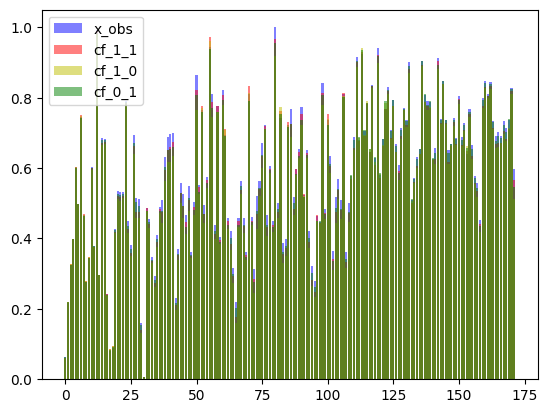

In [19]:
#x_obs are true vals and features are cfs
plt.bar(np.arange(172), filtered_rows_for_cf[partipant,48:], color='b', alpha=0.5,label='x_obs')
plt.bar(np.arange(172), features[partipant,0:], color='r', alpha=0.5,label='cf_1_1') #features[:, 0:-1]
plt.bar(np.arange(172), features_1[partipant,0:], color='y', alpha=0.5,label='cf_1_0') #features[:, 0:-1]
plt.bar(np.arange(172), features_2[partipant,0:], color='g', alpha=0.5,label='cf_0_1') #features[:, 0:-1]

plt.legend()

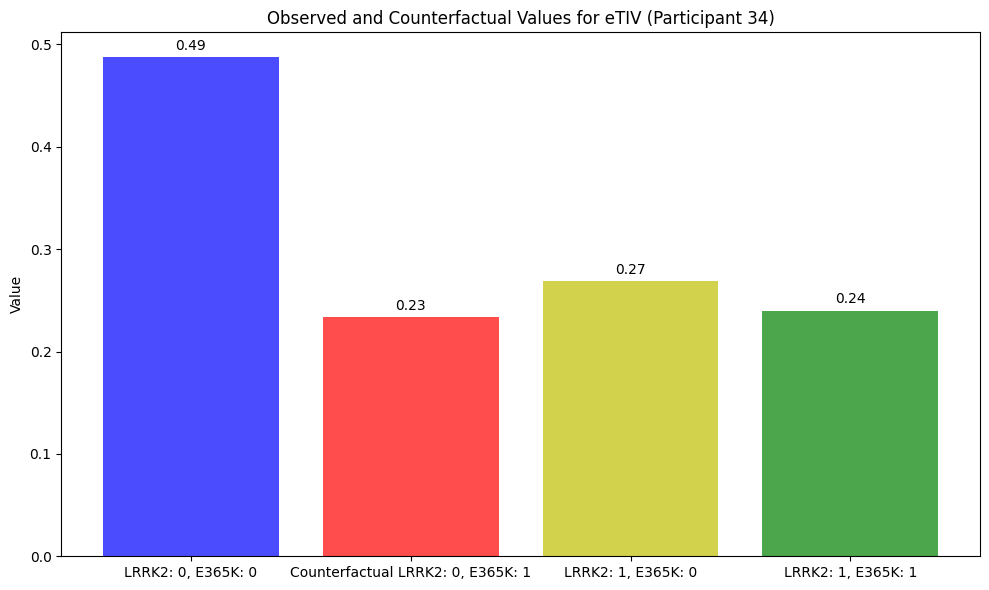

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Participant index
participant = 34  # Change this to the participant you are interested in

# Feature index 219 (considering Python's 0-based index, it's the 220th feature)
feature_index = 147#219 #147, 130

# Extract values for feature 219 for the specific participant
x_obs = filtered_rows_for_cf[participant, feature_index]  # Observed value
cf_0_1 = features[participant, -1]             # Counterfactual 1_1
cf_1_0 = features_1[participant, -1]           # Counterfactual 1_0
cf_1_1 = features_2[participant, -1]           # Counterfactual 0_1

# Data for the bar plot
labels = ['LRRK2: 0, E365K: 0', 'Counterfactual LRRK2: 0, E365K: 1', 'LRRK2: 1, E365K: 0', 'LRRK2: 1, E365K: 1']
values = [x_obs, cf_1_0, cf_0_1, cf_1_1]
colors = ['b', 'r', 'y', 'g']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
bars = ax.bar(labels, values, color=colors, alpha=0.7)

# Add values on top of each bar for clarity
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Labels and title
ax.set_ylabel('Value')
ax.set_title('Observed and Counterfactual Values for eTIV (Participant {})'.format(participant))

# Display the plot
plt.tight_layout()


plot_filename = f"/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/ppmi_testset/snps/CF_plot_ind{participant}_eTIV_LRRK2_E365K_true00.svg"
plt.savefig(plot_filename)


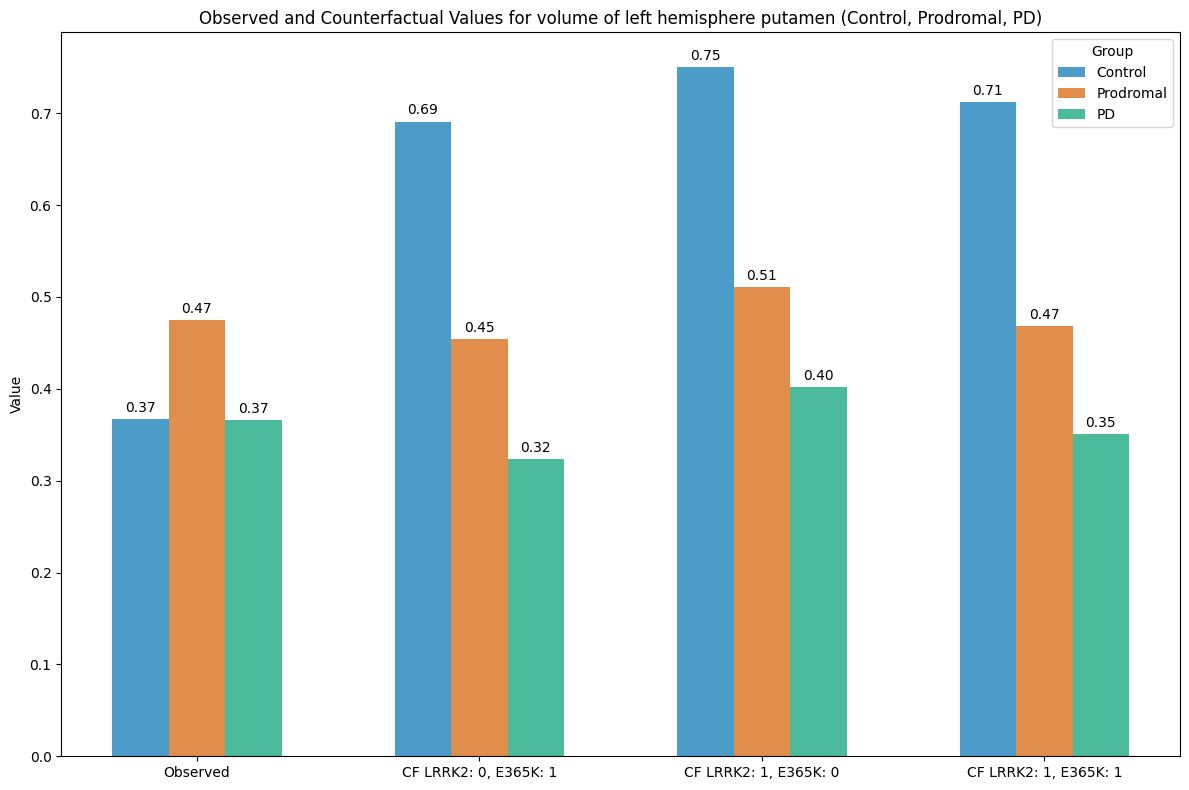

In [72]:
import matplotlib.pyplot as plt
import numpy as np

x_obs = val_set
filtered_rows_for_cf = x_obs[ (x_obs[:,4] == 0 ) & (x_obs[:,30] == 0)] # > 1 (x_obs[:, 1] == 1)] &


# List of participant indices to plot
participants = [5, 48, 4]  # Change these to the participants you are interested in

# Corresponding custom labels for the legend
custom_labels = ['Control', 'Prodromal', 'PD']  # Custom labels for the participants

# Feature index 219 (considering Python's 0-based index, it's the 220th feature)
feature_index = 130 #147

# Define labels for the bars
labels = ['Observed', 'CF LRRK2: 0, E365K: 1', 'CF LRRK2: 1, E365K: 0', 'CF LRRK2: 1, E365K: 1']

# Define colorblind-friendly colors for each participant's bars
participant_colors = ['#0072B2', '#D55E00', '#009E73']  # Blue, Orange, Green

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Width of each bar
bar_width = 0.2

# Positions of the bars on the x-axis
r = np.arange(len(labels))

# Loop through each participant to plot their values
for i, participant in enumerate(participants):
    # Extract values for feature 219 for the specific participant
    x_obs = filtered_rows_for_cf[participant, feature_index]  # Observed value
    cf_0_1 = features[participant, -1]                        # Counterfactual 0_1
    cf_1_0 = features_1[participant, -1]                      # Counterfactual 1_0
    cf_1_1 = features_2[participant, -1]                      # Counterfactual 1_1
    
    # Values for the bar plot
    values = [x_obs, cf_1_0, cf_0_1, cf_1_1]

    # Calculate bar positions
    bar_positions = [pos + bar_width * i for pos in r]

    # Use a single color for each participant's bars
    color = participant_colors[i]
    
    # Plot the bars
    bars = ax.bar(bar_positions, values, width=bar_width, color=color, alpha=0.7, label=custom_labels[i])

    # Add values on top of each bar for clarity
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Labels and title
ax.set_ylabel('Value')
ax.set_title('Observed and Counterfactual Values for volume of left hemisphere putamen (Control, Prodromal, PD)')

# Add x-axis labels for each group of bars
ax.set_xticks([r + bar_width for r in range(len(labels))])
ax.set_xticklabels(labels)

# Add a legend with custom labels
ax.legend(title='Group')

# Display the plot
plt.tight_layout()

# Save the plot
plot_filename = f"/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/ppmi_testset/snps/CF_plot_multi_participants_makeAllSameForBothPut_5_48_4_lPutamen_LRRK2_E365K_true00.svg"
plt.savefig(plot_filename)
plt.show()


In [65]:
filtered_rows_for_cf

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
2,59.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.839262,0.837517,0.886881,0.792271,0.693004,0.724551,0.647520,0.724506,0.739639,0.531695
328,52.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.874835,0.656778,0.692852,0.739821,0.753086,0.655689,0.851828,0.734650,0.761424,0.583848
122,56.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.732543,0.811502,0.725059,0.789510,0.528395,0.447305,0.587467,0.358249,0.743358,0.257459
276,60.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.974967,0.858969,0.916732,1.000000,0.923457,0.801796,0.930809,0.845168,0.769394,0.457260
128,50.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.651515,0.805112,0.683425,0.717046,0.573663,0.479042,0.375326,0.477309,0.772582,0.377802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,75.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.774045,0.724783,0.679497,0.592823,0.587654,0.517964,0.669713,0.516818,0.753985,0.559174
91,52.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.796443,0.864902,0.733700,0.658385,0.629630,0.754491,0.637728,0.697277,0.777896,0.481568
263,60.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.819499,0.698768,0.819324,0.753623,0.780247,0.705988,0.831593,0.609183,0.798618,0.385339
106,49.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,...,0.701581,0.645367,0.627651,0.621808,0.479012,0.676048,0.629243,0.610251,0.729012,0.620937


In [69]:
x_obs = filtered_rows_for_cf.iloc[0, 2]

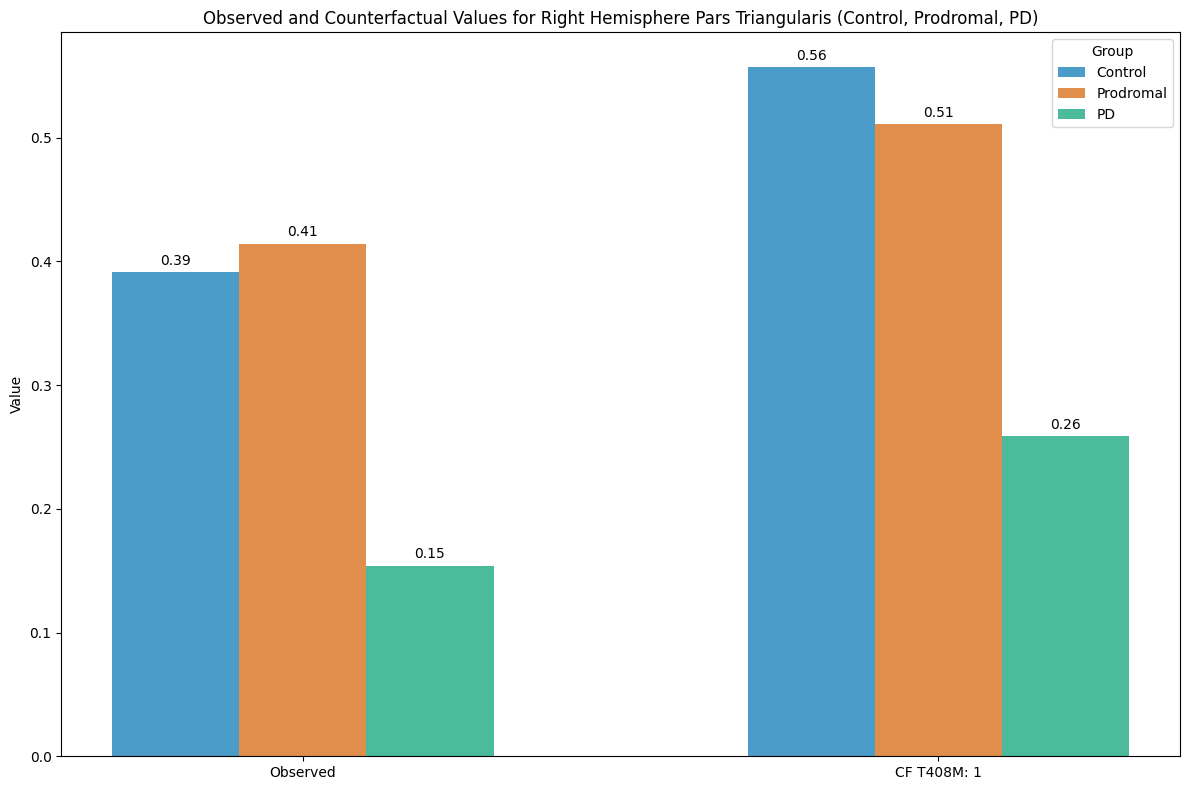

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# List of participant indices to plot
participants = [0,56,2]#[0, 21, 4]  # Change these to the participants you are interested in

# Corresponding custom labels for the legend
custom_labels = ['Control','Prodromal','PD']#['PD', 'PD', 'PD']  # Custom labels for the participants

# Feature index 219 (considering Python's 0-based index, it's the 220th feature)
feature_index = 147# 147 #189

# Define labels for the bars
labels = ['Observed', 'CF T408M: 1']

# Define colorblind-friendly colors for each participant's bars
participant_colors = ['#0072B2', '#D55E00', '#009E73']  # Blue, Orange, Green

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Width of each bar
bar_width = 0.2

# Positions of the bars on the x-axis
r = np.arange(len(labels))

# Loop through each participant to plot their values
for i, participant in enumerate(participants):
    # Extract values for feature 219 for the specific participant
    x_obs = filtered_rows_for_cf.iloc[participant, feature_index]  # Observed value
    cf_0_1 = features[participant, -1]                        # Counterfactual 0_1

    
    # Values for the bar plot
    values = [x_obs, cf_0_1]

    # Calculate bar positions
    bar_positions = [pos + bar_width * i for pos in r]

    # Use a single color for each participant's bars
    color = participant_colors[i]
    
    # Plot the bars
    bars = ax.bar(bar_positions, values, width=bar_width, color=color, alpha=0.7, label=custom_labels[i])

    # Add values on top of each bar for clarity
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Labels and title
ax.set_ylabel('Value')
ax.set_title('Observed and Counterfactual Values for Right Hemisphere Pars Triangularis (Control, Prodromal, PD)')

# Add x-axis labels for each group of bars
ax.set_xticks([r + bar_width for r in range(len(labels))])
ax.set_xticklabels(labels)

# Add a legend with custom labels
ax.legend(title='Group')

# Display the plot
plt.tight_layout()

# Save the plot
plot_filename = f"/media/gdagasso/TOSHIBA EXT/prs-pd-counterfactual/CF_dataframes/ppmi_testset/snps/CF_plot_multi_participants_rightParsTriang_T408M_true00.svg"
plt.savefig(plot_filename)
plt.show()


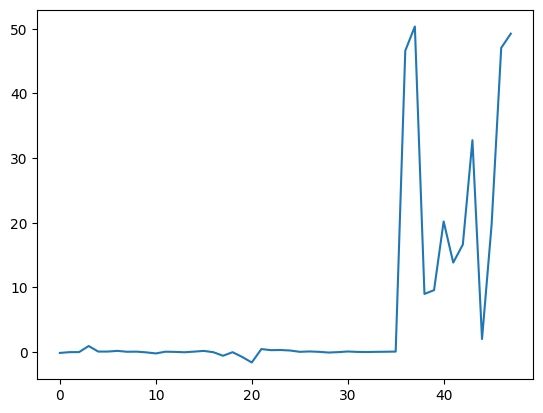

In [54]:
plt.plot(x_obs[partipant,4:-1] -features[partipant,0:-1])

In [55]:
np.argmax(x_obs[partipant,3:] -features[partipant,:])

ValueError: operands could not be broadcast together with shapes (50,) (49,) 

In [56]:
dataset.df.columns[126]

'Left.Lateral.Ventricle'

In [57]:
diff = x_obs[partipant,4:-1] -features[partipant,0:-1] # [:, 1:]
vals = np.argwhere(abs(diff) > 5)
#vals = np.argwhere(diff > 0)

In [58]:
for val in vals:
    print(val, diff[val])
    print(dataset.df.columns[val+126]) #4 UKBB, 25 PPMI

[36] [46.58767017]
Index(['BrainSegVol'], dtype='object')
[37] [50.34342416]
Index(['BrainSegVolNotVent'], dtype='object')
[38] [8.99701585]
Index(['lhCortexVol'], dtype='object')
[39] [9.5852163]
Index(['rhCortexVol'], dtype='object')
[40] [20.2046974]
Index(['CortexVol'], dtype='object')
[41] [13.84734487]
Index(['lhCerebralWhiteMatterVol'], dtype='object')
[42] [16.63159738]
Index(['rhCerebralWhiteMatterVol'], dtype='object')
[43] [32.76794708]
Index(['CerebralWhiteMatterVol'], dtype='object')
[45] [19.72427591]
Index(['TotalGrayVol'], dtype='object')
[46] [47.03150346]
Index(['SupraTentorialVol'], dtype='object')
[47] [49.2351229]
Index(['SupraTentorialVolNotVent'], dtype='object')
